In [44]:
import pandas as pd
from fanalysis.ca import CA
import numpy as np
import matplotlib.pyplot as plt

In [45]:
df = pd.read_excel("donnee.xlsx")
df

,yeux,Chatains,Roux,Blonds
0,Marrons,119,26,7
1,Noisette,54,14,10
2,Verts,29,14,16
3,Bleus,84,17,94


In [46]:
hair_colors = list(df.columns)[1:]
eye_colors = df['yeux']

0     Marrons
1    Noisette
2       Verts
3       Bleus
Name: yeux, dtype: object

In [47]:
X = df[hair_colors].values

In [48]:
#calcul du profil ligne
row_sum = np.sum(X, axis=1)
row_profile = X/row_sum[:,np.newaxis]

#affichage
print("profil ligne: ")
print(pd.DataFrame(row_profile, index=eye_colors, columns=hair_colors))

profil ligne: 
          Chatains      Roux    Blonds
yeux                                  
Marrons   0.782895  0.171053  0.046053
Noisette  0.692308  0.179487  0.128205
Verts     0.491525  0.237288  0.271186
Bleus     0.430769  0.087179  0.482051


<BarContainer object of 3 artists>

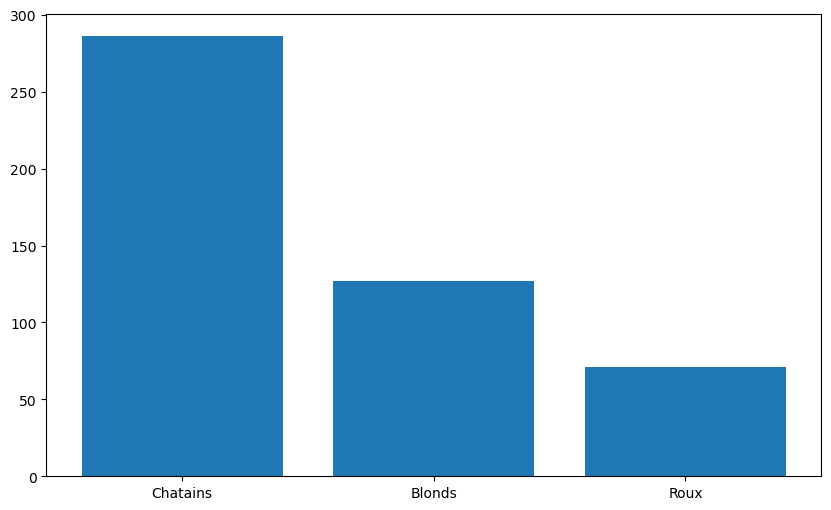

In [49]:
#extraction des noms de colonnes
hair_colors = list(df.columns)[1:]

#calcul de la somme des effectifs pour chaque couleur d'yeux
total_hair = df[hair_colors].sum()

#calcul des proportions pour chaque couleur d'yeux
prop_effectifs = total_hair
#tri des proportions de la plus grande à la plus petite
prop_effectifs = prop_effectifs.sort_values(ascending=False)

#création du diagramme en barres
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(prop_effectifs.index, prop_effectifs)

In [50]:
df = df.set_index('yeux')

In [51]:
#on crée un instale de la classe CA en passant les étiquettes de lignes et les colonnes

my_ca = CA(row_labels=df.index.values,col_labels=df.columns.values,stats=True)

In [52]:
my_ca.fit(df.values)

CA(col_labels=array(['Chatains', 'Roux', 'Blonds'], dtype=object),
   row_labels=array(['Marrons', 'Noisette', 'Verts', 'Bleus'], dtype=object))

Aides à l'interprétation 

1) Choix du nombre d'axe factoriel

In [53]:
#identification des valeurs propres
my_ca.eig_

array([[1.91431541e-01, 1.06797414e-02],
       [9.47159103e+01, 5.28408967e+00],
       [9.47159103e+01, 1.00000000e+02]])

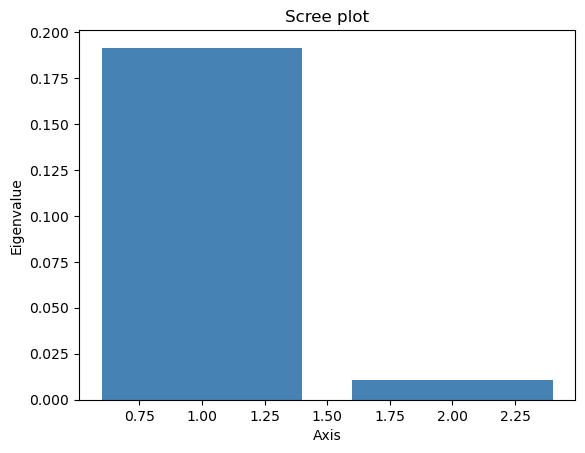

In [54]:
# Graphique des valeurs propres
my_ca.plot_eigenvalues()

Analyse des qualités de représentation (cos^2)

1) analyse suivant le profil ligne(les couleurs des yeux)

Premier axe factoriel


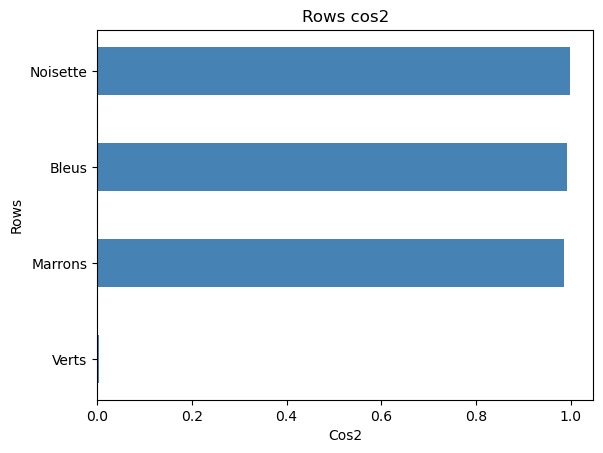

Second axe factoriel


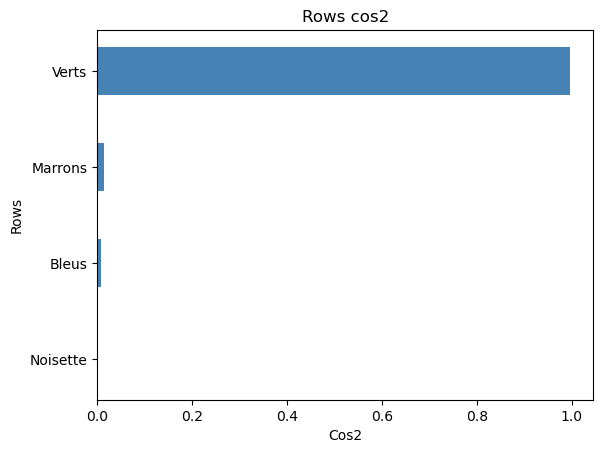

In [55]:
print("Premier axe factoriel")
my_ca.plot_row_cos2(num_axis=1)
print("Second axe factoriel")
my_ca.plot_row_cos2(num_axis=2)

Premier axe factoriel


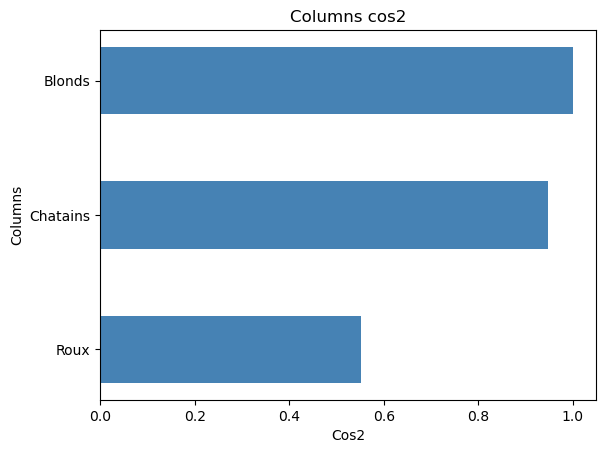

Second axe factoriel


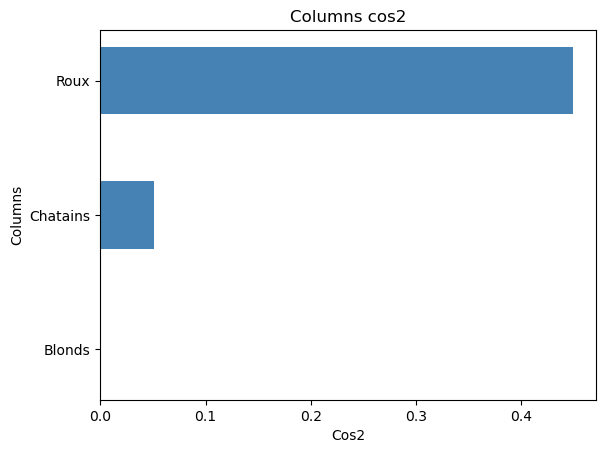

In [56]:
#profil colonnes (les couleurs des cheveux)
print("Premier axe factoriel")
my_ca.plot_col_cos2(num_axis=1)
print("Second axe factoriel")
my_ca.plot_col_cos2(num_axis=2)

Analyse des contributions

1) Profil lignes (couleurs des yeux)

premier axe


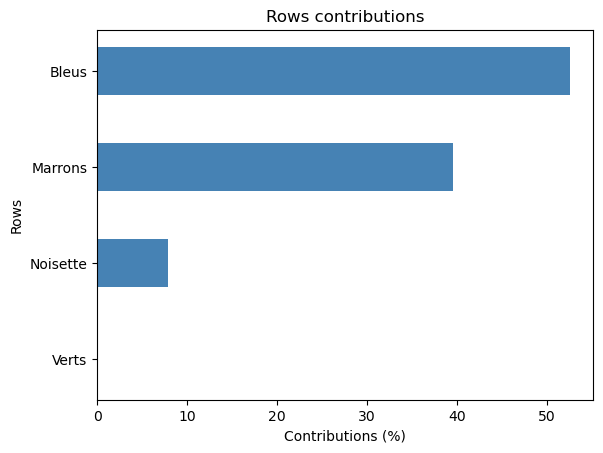

Second axe


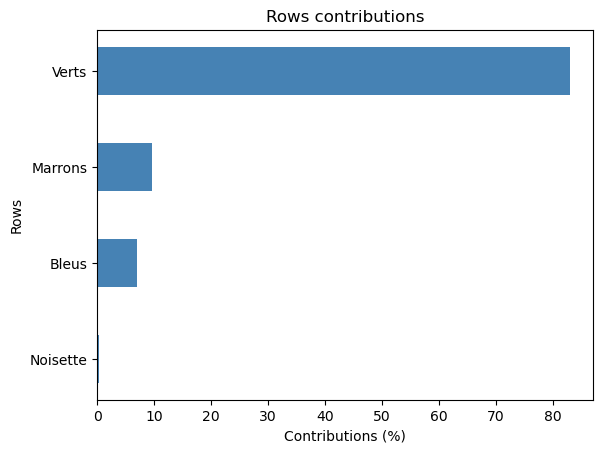

In [57]:
#Analyse du premier plan factoriel - les couleurs des yeux
print("premier axe")
my_ca.plot_row_contrib(num_axis=1)
print("Second axe")
my_ca.plot_row_contrib(num_axis=2)

2) Profil colonne(Couleurs des cheveux)

Premier axe


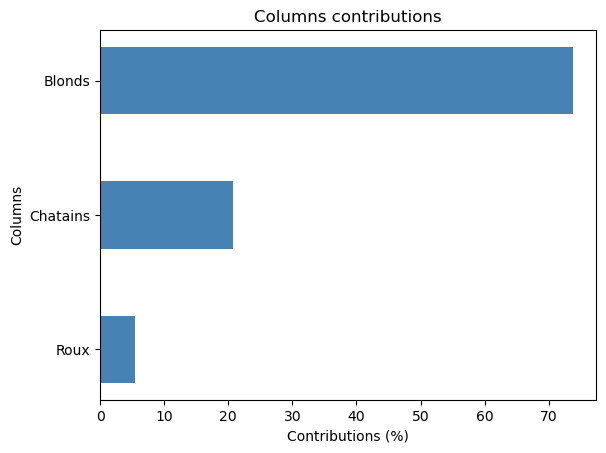

Second axe


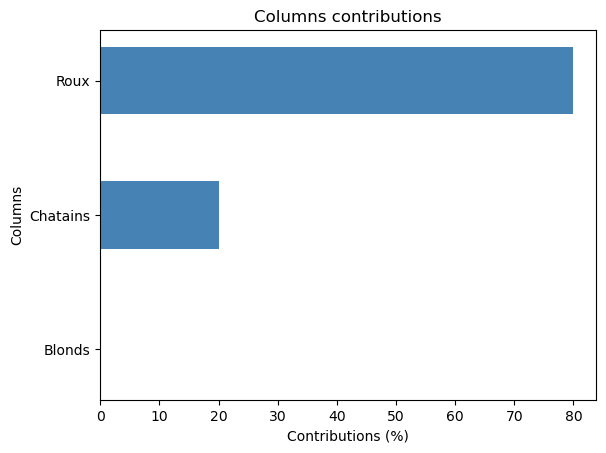

In [58]:
#Analyse du premier plan factoriel - les couleurs des yeux
print("Premier axe")
my_ca.plot_col_contrib(num_axis=1)
print("Second axe")
my_ca.plot_col_contrib(num_axis=2)

Tableau global

In [59]:
info_eye=my_ca.row_topandas()
info_eye

,row_coord_dim1,row_coord_dim2,row_contrib_dim1,row_contrib_dim2,row_cos2_dim1,row_cos2_dim2
Marrons,-0.491421,-0.057443,39.618024,9.702975,0.986521,0.013479
Noisette,-0.305127,0.015955,7.837851,0.384131,0.997273,0.002727
Verts,0.018342,0.269483,0.021424,82.891349,0.004612,0.995388
Bleus,0.499558,-0.043142,52.522700,7.021546,0.992597,0.007403


In [60]:
info_hair = my_ca.col_topandas()
info_hair

,col_coord_dim1,col_coord_dim2,col_contrib_dim1,col_contrib_dim2,col_cos2_dim1,col_cos2_dim2
Chatains,-0.259413,-0.060327,20.772626,20.136465,0.948694,0.051306
Roux,-0.267168,0.241124,5.469767,79.860812,0.551104,0.448896
Blonds,0.733552,0.001053,73.757607,0.002723,0.999998,0.000002


Analyse Graphique

Graphique des couleurs des cheveux(profil ligne)

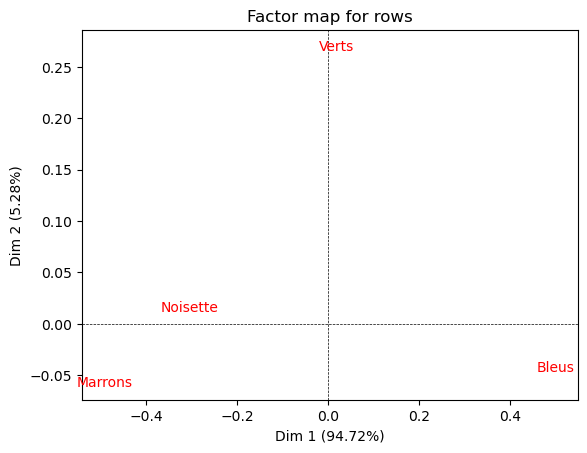

In [61]:
#Graphique des départements (en ligne)
my_ca.mapping_row(num_x_axis=1, num_y_axis=2)

Graphique des candidats(en colonne)

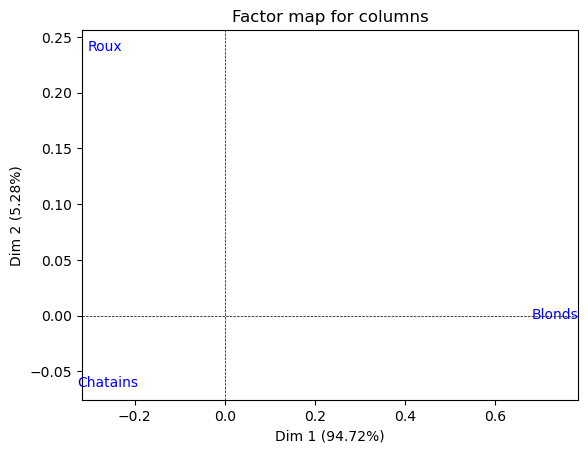

In [62]:
my_ca.mapping_col(num_x_axis=1,num_y_axis=2)

Graphique superposition des profils lignes et colonnes

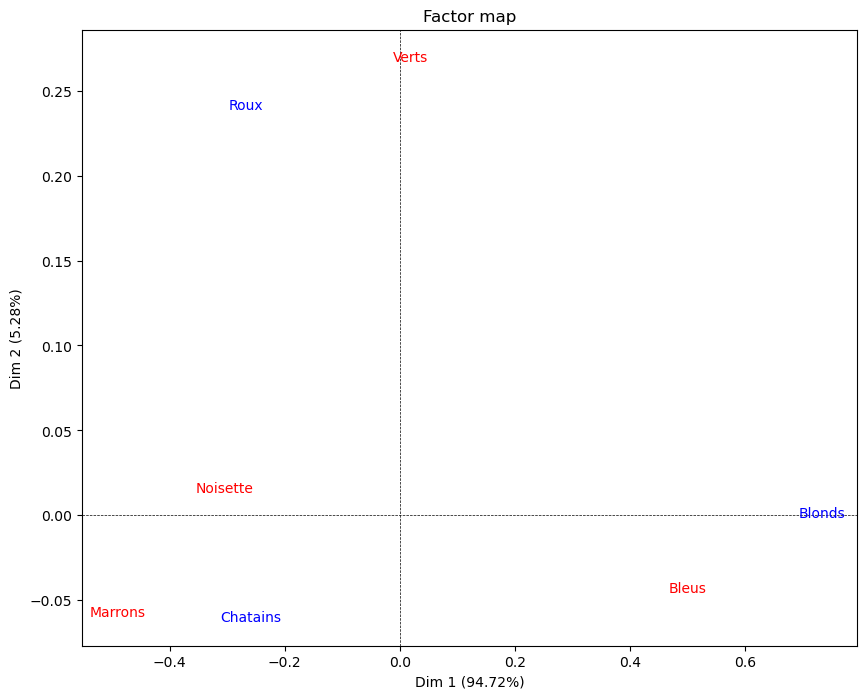

In [63]:
#graphique profil ligne profil colonne

my_ca.mapping(1,2, figsize=(10,8))